<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/JulyLeetCodePart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

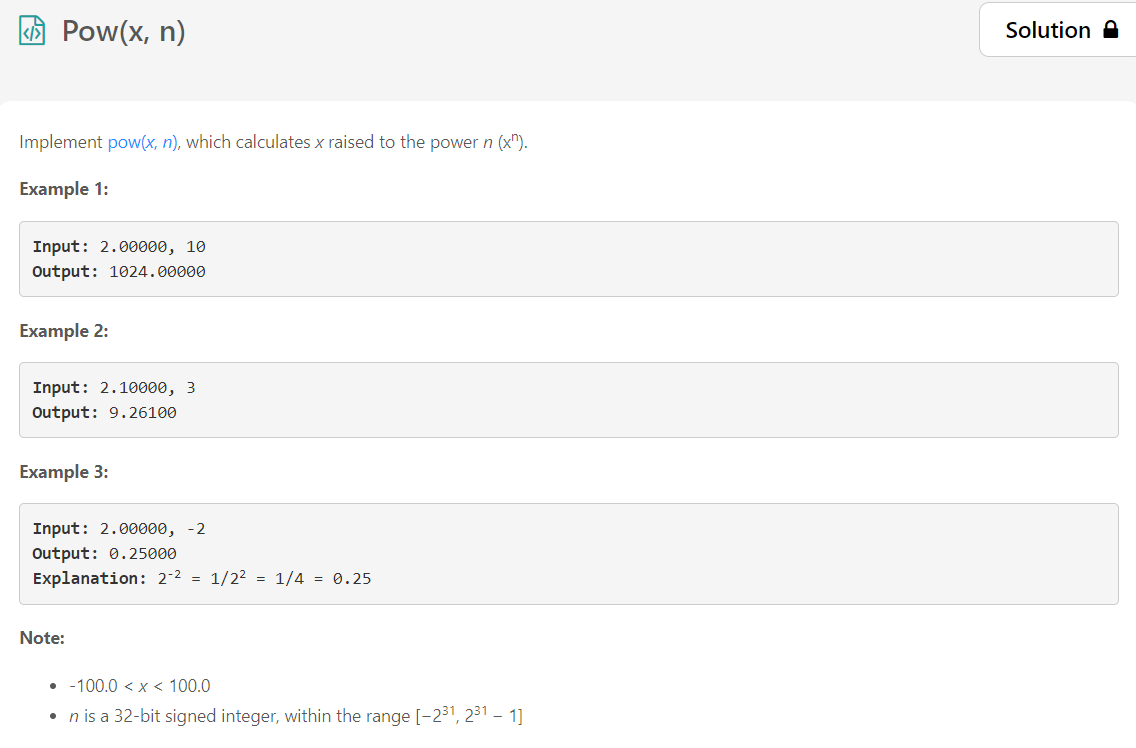

In [ ]:
''' July 16 th Pow(x, n) '''
'''Implement pow(x, n), which calculates x raised to the power n (xn).

Example 1:

Input: 2.00000, 10
Output: 1024.00000
Example 2:

Input: 2.10000, 3
Output: 9.26100
Example 3:

Input: 2.00000, -2
Output: 0.25000
Explanation: 2^-2 = 1/2^2 = 1/4 = 0.25
Note:

-100.0 < x < 100.0
n is a 32-bit signed integer, within the range [−2^31, 2^31 − 1]
'''




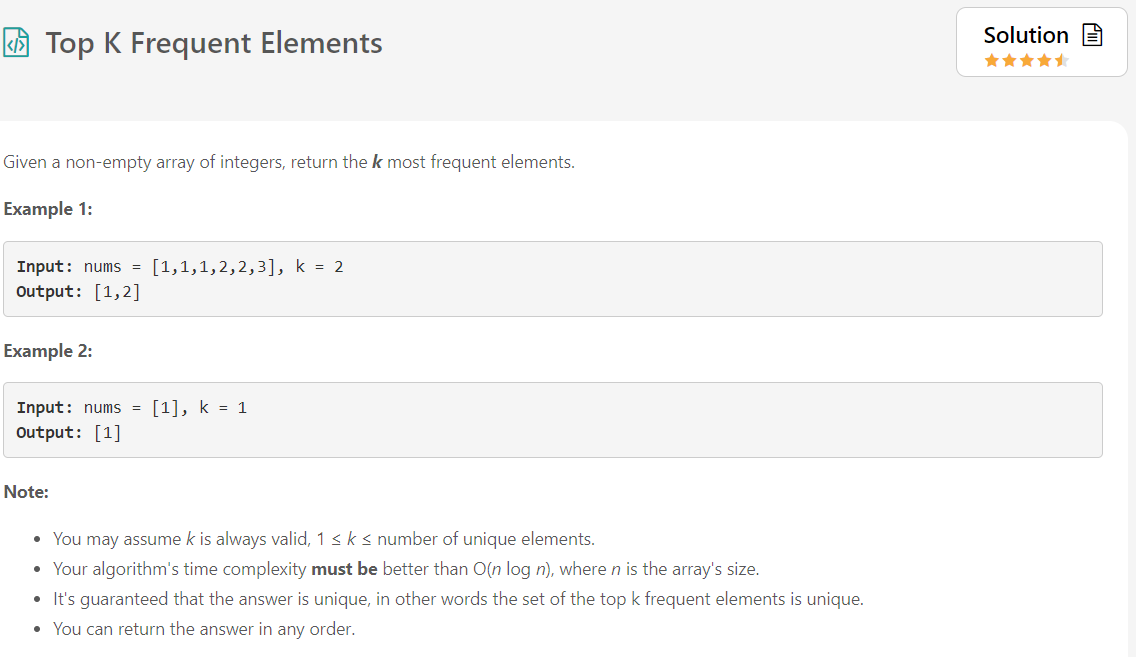

In [ ]:
''' July 17th Top K frequent elements '''



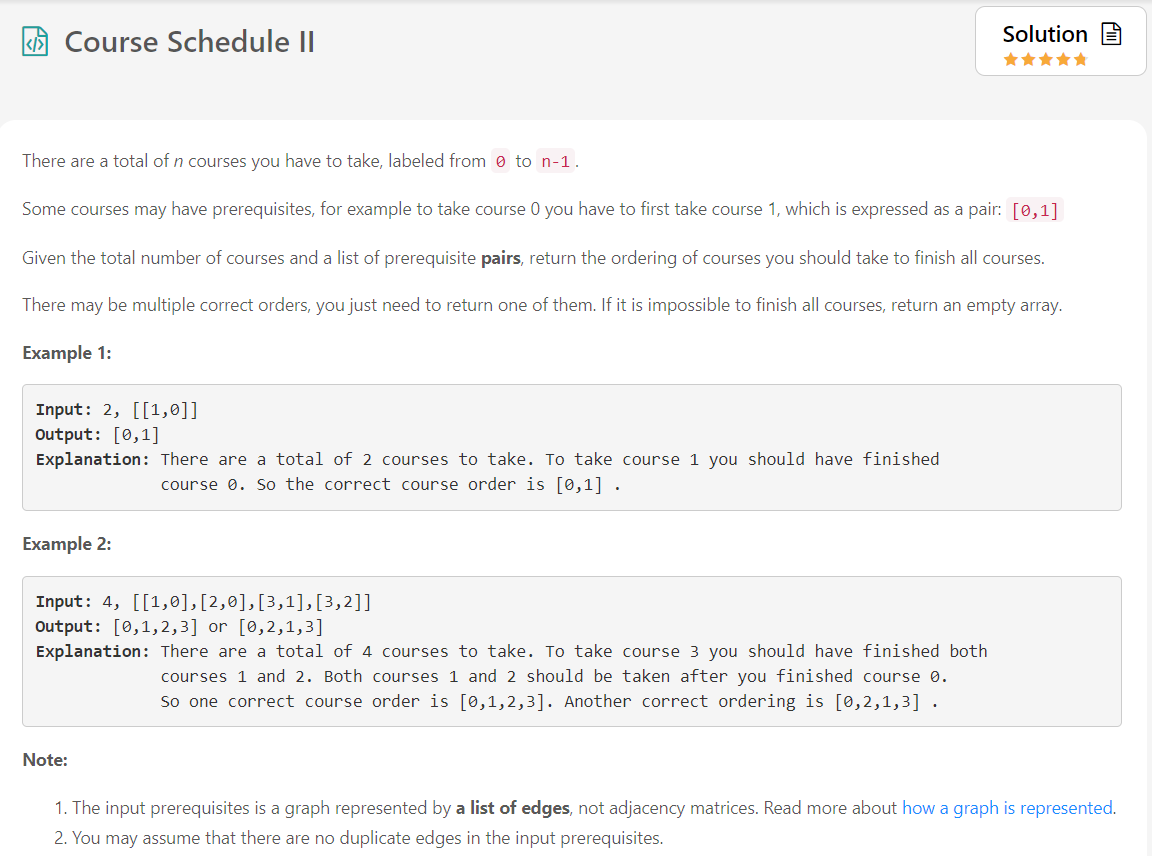

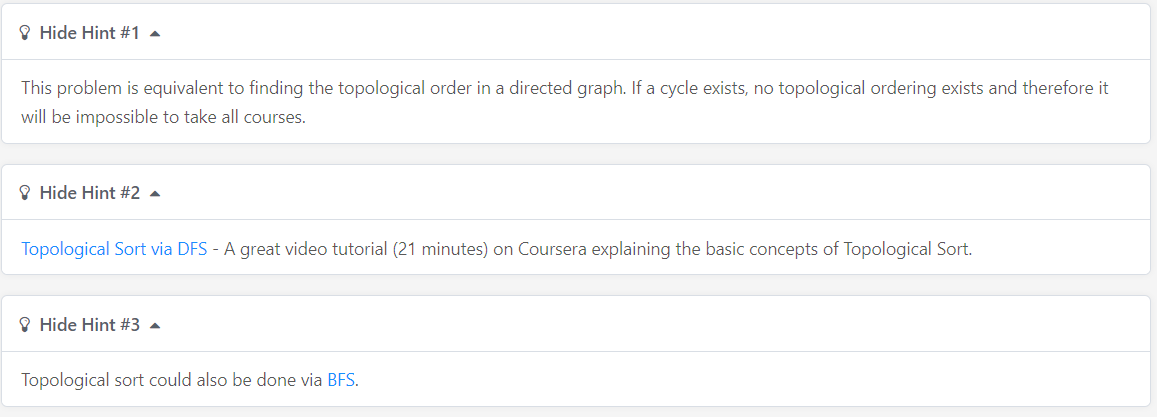


In [ ]:
''' July 18th Course Schedule 
https://leetcode.com/explore/challenge/card/july-leetcoding-challenge/546/week-3-july-15th-july-21st/3394/

'''



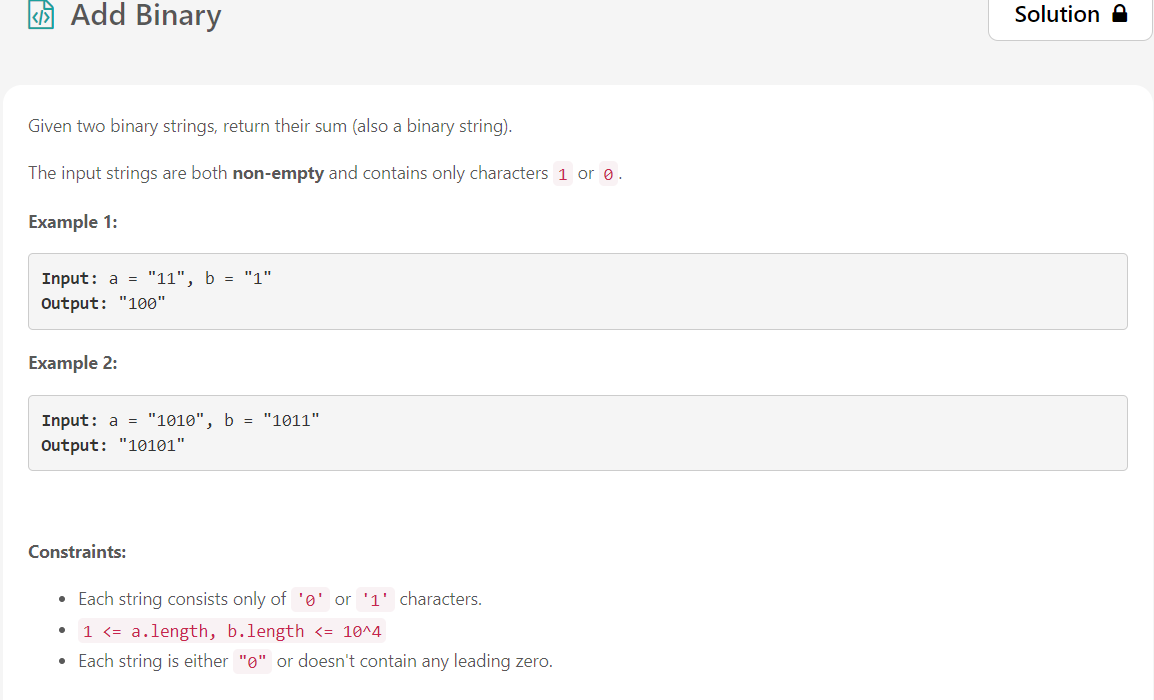

In [ ]:
''' July 19th  Add Binary 
Given two binary strings, return their sum (also a binary string).
The input strings are both non-empty and contains only characters 1 or 0.

Input: a = "11", b = "1"
Output: "100"

Input: a = "1010", b = "1011"
Output: "10101"

Constraints:

Each string consists only of '0' or '1' characters.
1 <= a.length, b.length <= 10^4
Each string is either "0" or doesn't contain any leading zero.

'''


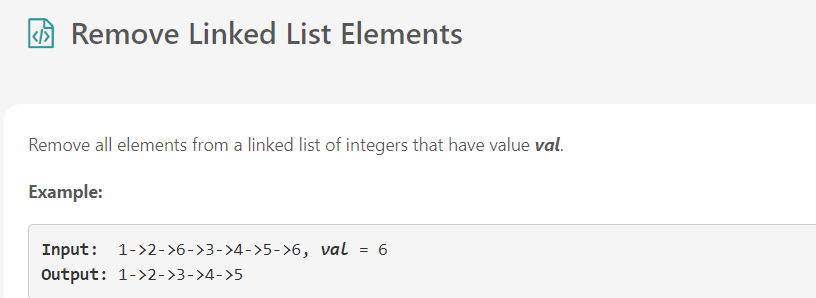

In [ ]:
''' July 20th Remove Linked List Elements '''



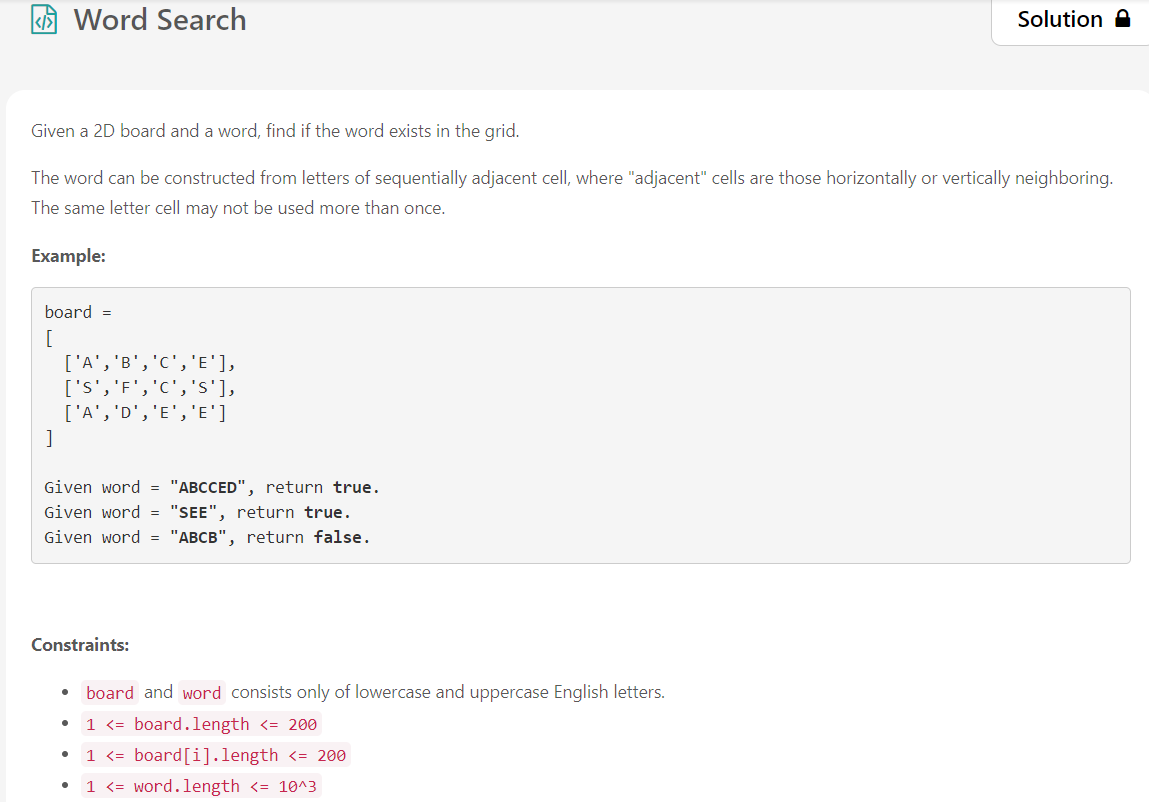

In [ ]:
''' Word Search July 21th
Given a 2D board and a word, find if the word exists in the grid.
The word can be constructed from letters of sequentially adjacent cell, 
where "adjacent" cells are those horizontally or vertically neighboring.
The same letter cell may not be used more than once.

board =
[
  ['A','B','C','E'],
  ['S','F','C','S'],
  ['A','D','E','E']
]

Given word = "ABCCED", return true.
Given word = "SEE", return true.
Given word = "ABCB", return false.

Constraints:
board and word consists only of lowercase and uppercase English letters.
1 <= board.length <= 200
1 <= board[i].length <= 200
1 <= word.length <= 10^3
'''
# Solution 
# For each starting position, depth first search moving
# in all 4 directions and marking visited cells.
# Time - O(m * n * s), for each starting board position, try upto s characters
# Space - O(1)

class Solution(object):
    def exist(self, board, word):
        """
        :type board: List[List[str]]
        :type word: str
        :rtype: bool
        """
        if not board or not board[0]:
            return False
        rows, cols = len(board), len(board[0])

        for r in range(rows):
            for c in range(cols):
                if self.can_find(word, 0, board, r, c):
                    return True
        return False


    def can_find(self, word, i, board, r, c):
        if i >= len(word): # nothing more of word to find
            return True
        if r < 0 or r >= len(board) or c < 0 or c >= len(board[0]): # outside board
            return False
        if word[i] != board[r][c]: # no match letter
            return False

        board[r][c] = '*' # set this position so cannot be used again

        if (self.can_find(word, i+1, board, r+1, c) or self.can_find(word, i+1, board, r-1, c) or
            self.can_find(word, i+1, board, r, c+1) or self.can_find(word, i+1, board, r, c-1)):
            return True

        board[r][c] = word[i] # if False, reset position to letter
        return False



## fastest submission 

class Solution:
    def exist(self, b, w):
        if not b or not b[0]: return False
        bc = Counter(chain(*b))
        wc = Counter(w)
        if any(c > bc[s] for s, c in wc.items()): return False
        m, n, wl = len(b), len(b[0]), len(w) - 1
        def dfs(d: int, x: int, y: int) -> bool:
            if w[d] != b[y][x]: return False
            if d == wl: return True
            c, b[y][x] = b[y][x], ''
            if x > 0 and dfs(d + 1, x - 1, y): return True
            if x < n-1 and dfs(d + 1, x + 1, y): return True
            if y > 0 and dfs(d + 1, x, y - 1): return True
            if y < m-1 and dfs(d + 1, x, y + 1): return True
            b[y][x] = c
            return False
        return any(dfs(0, j, i) for i in range(m) for j in range(n) if w[0] == b[i][j])



In [ ]:
# July 21, other submissions

from collections import Counter

# 1
class Solution1:
    def exist(self, board, word):
        if not board:
            return False
        for i in range(len(board)):
            for j in range(len(board[0])):
                if self.dfs(board, i, j, word):
                    return True
        return False

    def dfs(self, board, i, j, word):
        if len(word) == 0:
            return True
        if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]) or word[0] != board[i][j]:
            return False
        tmp = board[i][j]
        board[i][j] = "#"

        res = self.dfs(board, i + 1, j, word[1:]) or self.dfs(board, i - 1, j, word[1:]) or self.dfs(board, i, j + 1, word[1:]) or self.dfs(board, i, j - 1, word[1:])
        board[i][j] = tmp
        return res

# 2
class Solution:
    def exist(self, board, word):

        if not board or not board[0] or not word:
            return False
        if not self.checkContent(board, word):
            return False
        for i in range(len(board)):
            for j in range(len(board[0])):
                if word[0] == board[i][j] and self.deepDive(board, i, j, word, 1):
                    return True
        return False

    def checkContent(self, board, word):
        board_counter = Counter([char for row in board for char in row])
        word_counter = Counter(word)
        for char in word_counter:
            if board_counter[char] < word_counter[char]:
                return False
        return True

    def deepDive(self, board, i, j, word, position):
        if len(word) == position:
            return True
        m, n = len(board), len(board[0])
        old, board[i][j] = board[i][j], '#'
        if i > 0 and board[i - 1][j] != '#' and board[i - 1][j] == word[position] and self.deepDive(board, i - 1, j, word, position + 1):
            return True
        if i + 1 < m and board[i + 1][j] != '#' and board[i + 1][j] == word[position] and self.deepDive(board, i + 1, j, word, position + 1):
            return True
        if j > 0 and board[i][j - 1] != '#' and board[i][j - 1] == word[position] and self.deepDive(board, i, j - 1, word, position + 1):
            return True
        if j + 1 < n and board[i][j + 1] != '#' and board[i][j + 1] == word[position] and self.deepDive(board, i, j + 1, word, position + 1):
            return True
        board[i][j] = old
        return False

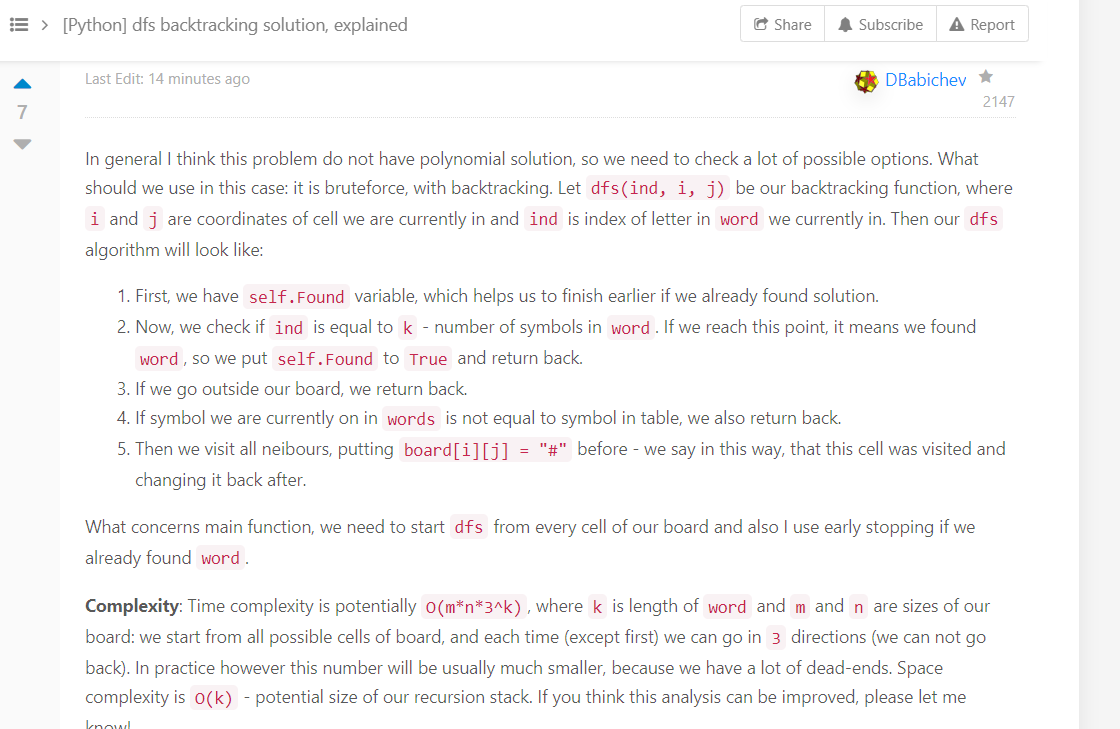

In [ ]:
# Code for the above approach 
class Solution:
    def exist(self, board, word):
        def dfs(ind, i, j):
            if self.Found: return        #early stop if word is found

            if ind == k:
                self.Found = True                #for early stopping
                return 

            if i < 0 or i >= m or j < 0 or j >= n: return 
            tmp = board[i][j]
            if tmp != word[ind]: return

            board[i][j] = "#"
            for x, y in [[0,-1], [0,1], [1,0], [-1,0]]:
                dfs(ind + 1, i+x, j+y)
            board[i][j] = tmp
        
        self.Found = False
        m, n, k = len(board), len(board[0]), len(word)
        
        for i, j in product(range(m), range(n)):
            if self.Found: return True          #early stop if word is found
            dfs(0, i, j)
        return self.Found

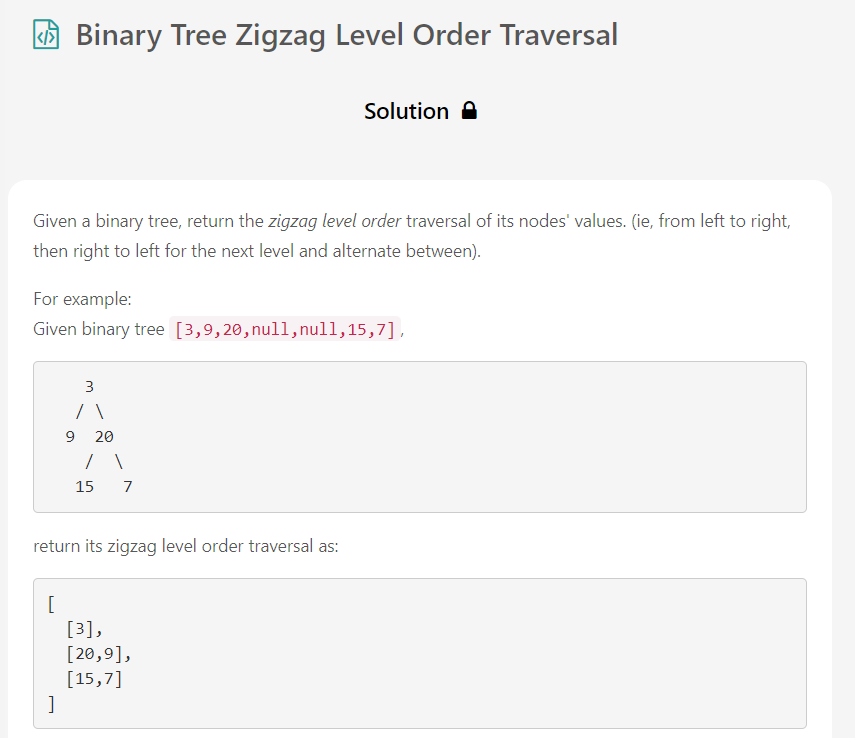

In [ ]:
'''July 22th Binary Tree Zigzag order traversal '''
# https://leetcode.com/problems/binary-tree-zigzag-level-order-traversal/
# Given a binary tree, return the zigzag level
# order traversal of its nodes' values.
# (ie, from left to right, then right to left
# for the next level and alternate between).

# Solution: Alternately append new nodes from left to right and right to left.
# Time - O(n)
# Space - O(n)

# Definition for a binary tree node.
# class TreeNode(object):
# def __init__(self, x):
# self.val = x
# self.left = None
# self.right = None

class Solution(object):
    def zigzagLevelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        # check if tree is empty
        if not root:
            return []
        # result list
        traversal = [] 

        # stack and direction 
        level = [root] 
        forward = True

        while level:
            # traverse the current level 
            new_level = []

            # append nodes value to result following the direction value 
            if forward:
                traversal.append([n.val for n in level])
            else:
                traversal.append([n.val for n in level[::-1]])
            
            # add next level nodes to new_level
            for node in level:
                if node.left:
                    new_level.append(node.left)
                if node.right:
                    new_level.append(node.right)

            # move to the next level and change the direction 
            level = new_level
            forward = not forward

        return traversal


In [ ]:
# https://leetcode.com/explore/featured/card/july-leetcoding-challenge/547/week-4-july-22nd-july-28th/3398/discuss/749036/Python-Clean-BFS-solution-explained
''' Leetcode explaination from discussion 

In this problem we need to traverse binary tree level by level.
When we see levels in binary tree, we need to think about bfs, 
because it is its logic: it first traverse all neighbors, before we go deeper.
Here we also need to change direction on each level as well. 
So, algorithm is the following:

We create queue, where we first put our root.
result is to keep final result and direction, equal to 1 or -1 is direction of traverse.
Then we start to traverse level by level: 
if we have k elements in queue currently, we remove them all and put their children instead. 
We continue to do this until our queue is empty. 
Meanwile we form level list and then add it to result, using correct direction and change direction after

Complexity: time complexity is O(n), where n is number of nodes in our binary tree. Space complexity is also O(n), because our result has this size in the end. If we do not count output as additional space, then it will be O(w), where w is width of tree. It can be reduces to O(1) I think if we traverse levels in different order directly, but it is just not worth it.
'''
class Solution:
    def zigzagLevelOrder(self, root):
        # check tree is empty
        if not root: return []
        # deque for a queue to allow pop left
        queue = deque([root])
        # initilize result and direction 
        result, direction = [], 1
        
        while queue:
            level = [] # save all same level node's values
            for i in range(len(queue)):
                node = queue.popleft()
                level.append(node.val) 
                if node.left:  queue.append(node.left)
                if node.right: queue.append(node.right)
                # result.append(arr[::-1])  when result = [], arr = [1,2,3] then result = [[3,2,1]]
                # result.append(arr) then result = [[1,2,3]]
            result.append(level[::direction]) #　add the list on the opposite direction 
            direction *= (-1) # change direction after traversing each level. 
        
        # when the queue is empty then finished. 
        return result



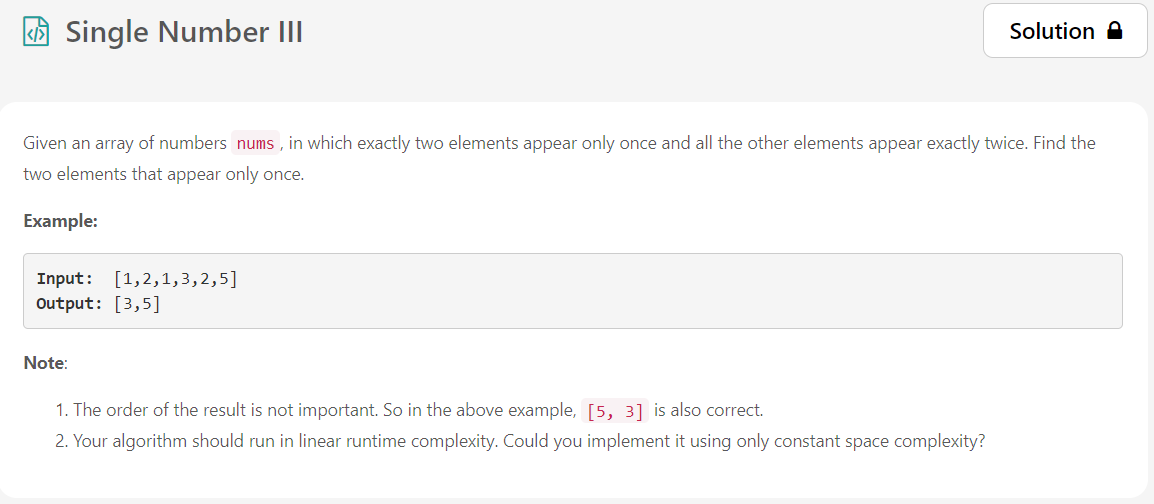

In [ ]:
'''July 23rd Single Number III '''



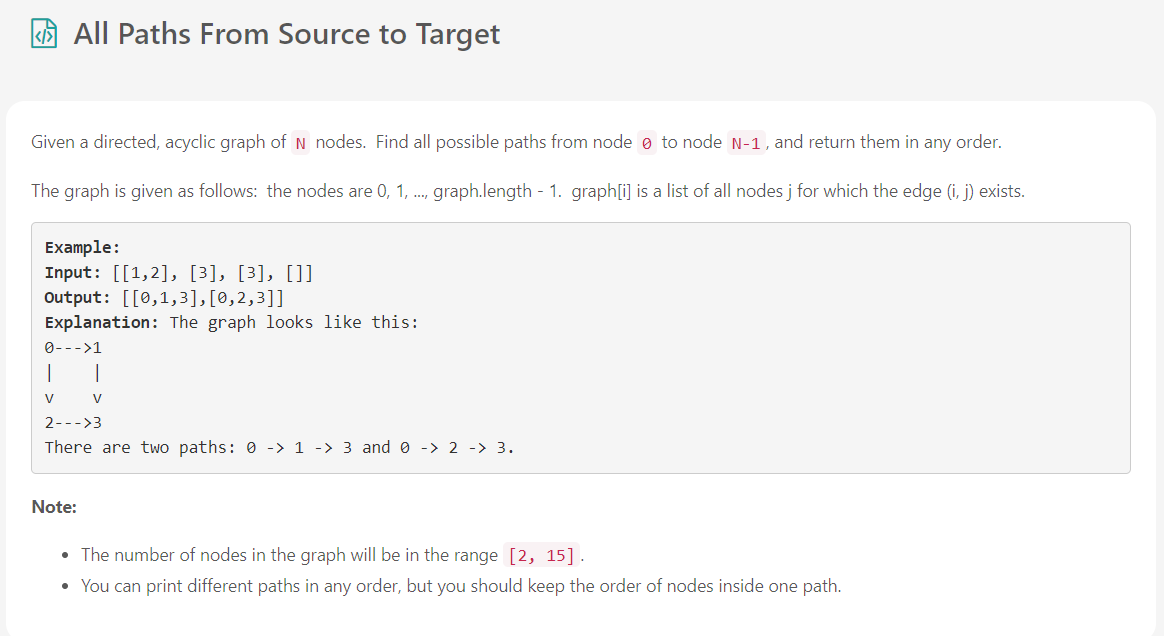

In [ ]:
''' July  24th all paths from source to target '''
# https://leetcode.com/problems/all-paths-from-source-to-target/discuss/118691/Easy-and-Concise-DFS-Solution-C++-2-line-Python
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        
        def dfs(cur, path):
            if cur == len(graph) - 1: 
                result.append(path)
            else:
                for i in graph[cur]: 
                    dfs(i, path + [i])
                    
        result = []
        dfs(0, [0])
        return result

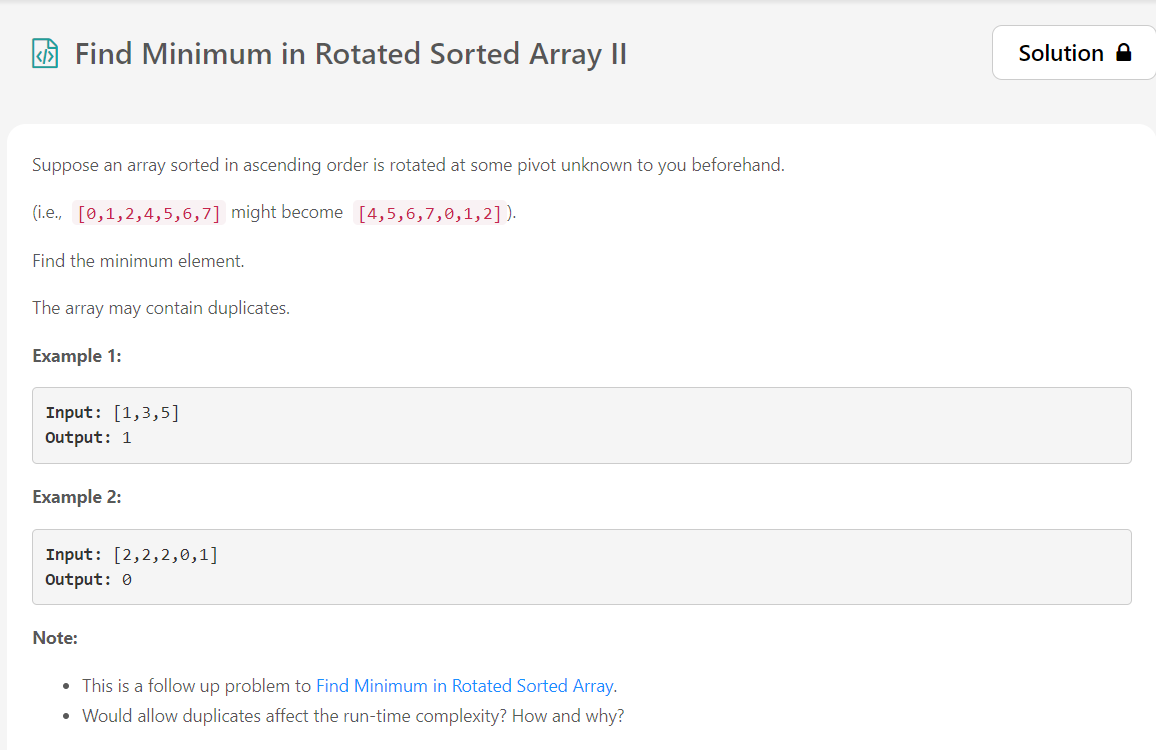

In [ ]:
''' July 25th Find Minimum in rotated sorted array II '''




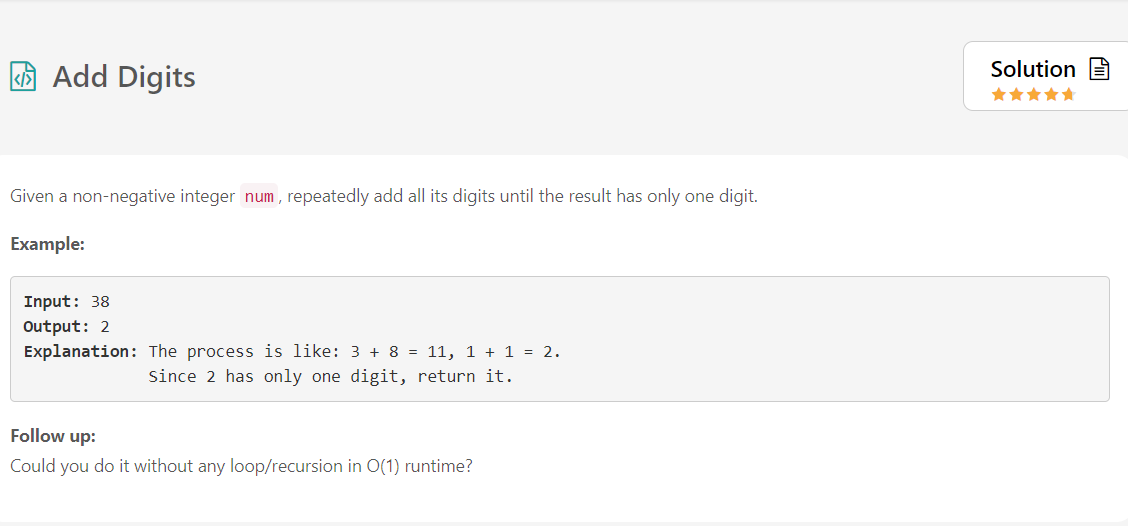

In [ ]:
''' July 26th add digits '''




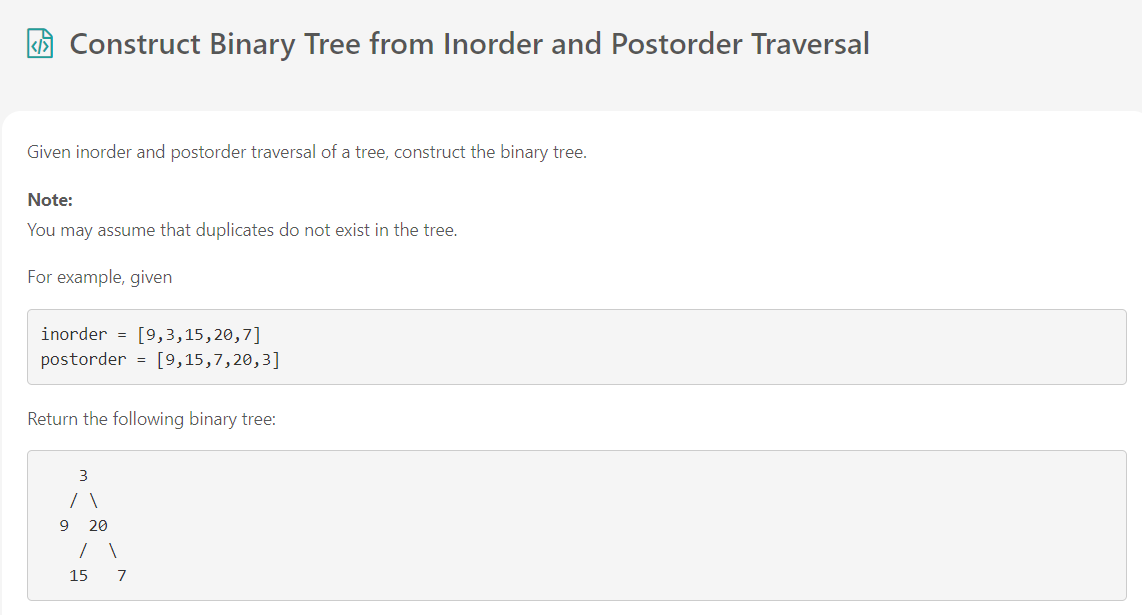

In [ ]:
''' July 27th   Construct Binary Tree from Inorder and Postorder Traversal '''
# Given inorder and postorder traversal of a tree, construct the binary tree.
# Note: You may assume that duplicates do not exist in the tree.

# For example:
# postorder = [9,15,7,20,3]  --- Left Right Root --- traverse from top leftside, the root will comes first -> 3 , then check left and right subtrees in inorder list. 
# inorder = [9,3,15,20,7]    --- Left Root Right --- got 3 as root, then left sub tree is 3, right subtree is 15,20,7  then scan root again with postorder list 
# Return the following binary tree:

#     3
#    / \
#   9  20
#     /  \
#    15   7

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

#### running but time limit exceeded. 
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> TreeNode:
        if not inorder:
            return None
        root_node = TreeNode(postorder[-1])

        for i in range(len(inorder)-1,-1,-1):
            if inorder[i] == postorder[-1]:     
                root_node.right = self.helper(inorder[i+1:], postorder)
                root_node.left = self.helper(inorder[:i], postorder)

        return root_node
    
    def helper(self,inorder: List[int], postorder: List[int]) -> TreeNode:
        if not inorder:
            return None
        
        for j in range(len(postorder)-1,-1,-1):
            if postorder[j] in inorder:
                node = TreeNode(postorder[j])
                
                for i in range(len(inorder)):
                    if inorder[i] == node.val: 
                        node.right = self.helper(inorder[i+1:], postorder) 
                        node.left = self.helper(inorder[:i], postorder)
                        
                break # This break was missing. 
                        
        return node 

# Leetcode solution. 
# construct in postorder. Last element of postorder is root. 
# Partition preorder at this element
# build the right subtree first until postorder[0] is not inorder 
# Recursive function 
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> TreeNode:
        if not inorder: # no inorder signifies null tree even if postorder is not null
            return None

        inorder_index = inorder.index(postorder.pop()) # Line A
        root = TreeNode(inorder[inorder_index])

        # Line B and C
        root.right = self.buildTree(inorder[inorder_index+1:], postorder) # right first
        root.left = self.buildTree(inorder[:inorder_index], postorder)

        return root
""" solution comment 
go right first 
ecause inorder traversal goes 'Left-Parent-Right' and postorder traversal goes 'Left-Right-Parent'. 
And, postorder.pop() keeps picking the right-most element of the list, 
that means it should go 'Parent-(one of parents of) Right (subtree) - Left'. 
So, switching the order doesn't work
"""

""" However the above solution modified the postorder by popping it unncessarily
Line A takes O(N) time.
Line B and C takes O(N) time and extra space.
Thus, the overall running time and extra space is O(N^2).
So this implementation has a very bad performance, and you can avoid it.

We should use index instead of popping. 
"""
# 2nd fastest submission
# This is the best solution for me so far !!!!!
class Solution:
    def buildTree(self, inorder, postorder):
        map_inorder = {}
        for i, val in enumerate(inorder): map_inorder[val] = i

        def recur(low, high):
            if low > high: return None
            node = TreeNode(postorder.pop())
            mid = map_inorder[node.val]
            node.right = recur(mid+1, high)
            node.left = recur(low, mid-1)
            return node

        return recur(0, len(inorder)-1)


# fastest submission using loop
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> TreeNode:
        if len(postorder) == 0:
            return None
        head = TreeNode(postorder[-1])
        stack = [head]
        i = len(postorder)-2     
        j = len(postorder)-1          
        while i>=0:
            temp=None
            t = TreeNode(postorder[i])
            while stack and stack[-1].val==inorder[j]:
                temp=stack.pop()
                j-=1
            if temp:
                temp.left=t
            else:
                stack[-1].right=t
            stack.append(t)
            i-=1
        return head

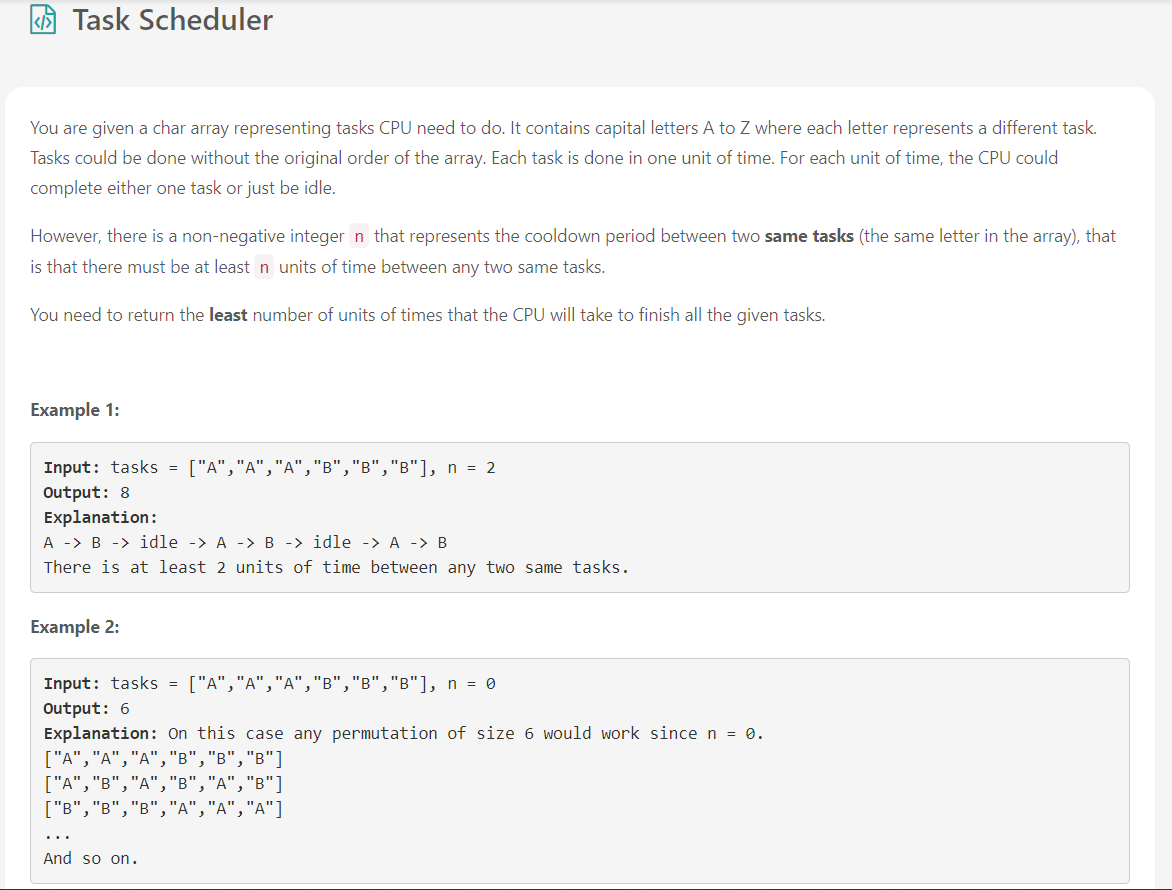

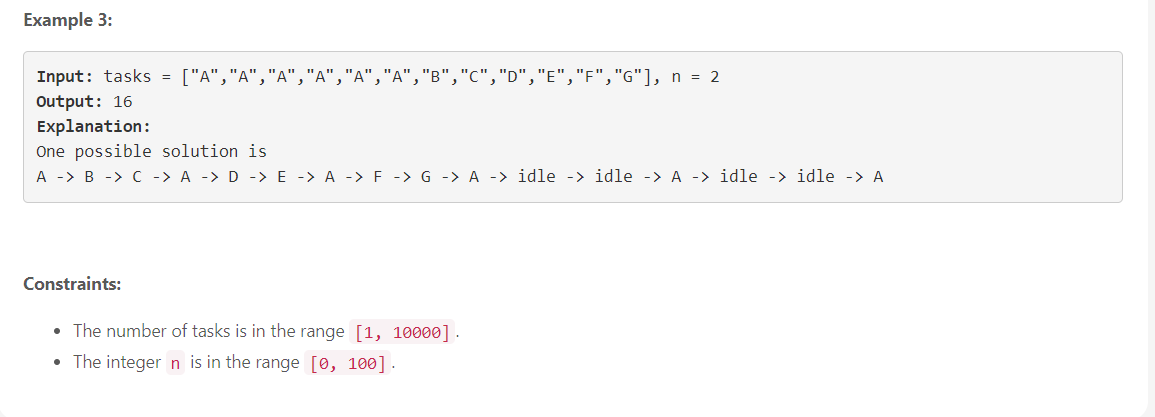

In [ ]:
# Find the most frequent task and calculate the time to complete
# all instances of this task as the wait between tasks
# (n + 1) times the number of waits (nb_tasks - 1). For each
# task with the same count as the most frequent, increment
# the finishing time. All less frequent tasks can be scheduled
# to fill the remaining idle time, or else they extend
# the finish time without any idle time.
# In other words, the only situation when the tasks cannot
# be completed without idle time is when the most frequent
# task(s) cannot be scheduled within the length of tasks.
# Time - O(n * m), nb tasks * nb types of task
# Space - O(m)

from collections import Counter 
class Solution(object):     
    def leastInterval(self, tasks, n):         
        """         
        :type tasks: List[str]         
        :type n: int         
        :rtype: int         
        """         
        counts = Counter(tasks)        
        max_count = max(counts.values())         
        result = (max_count - 1) * (n + 1)  # n + 1 time between max_count tasks         
        
        for count in counts.values():             
            if count == max_count:          
                # each task pushes back finish time                 
                result += 1  

        return max(result, len(tasks))      # other tasks fill idle time


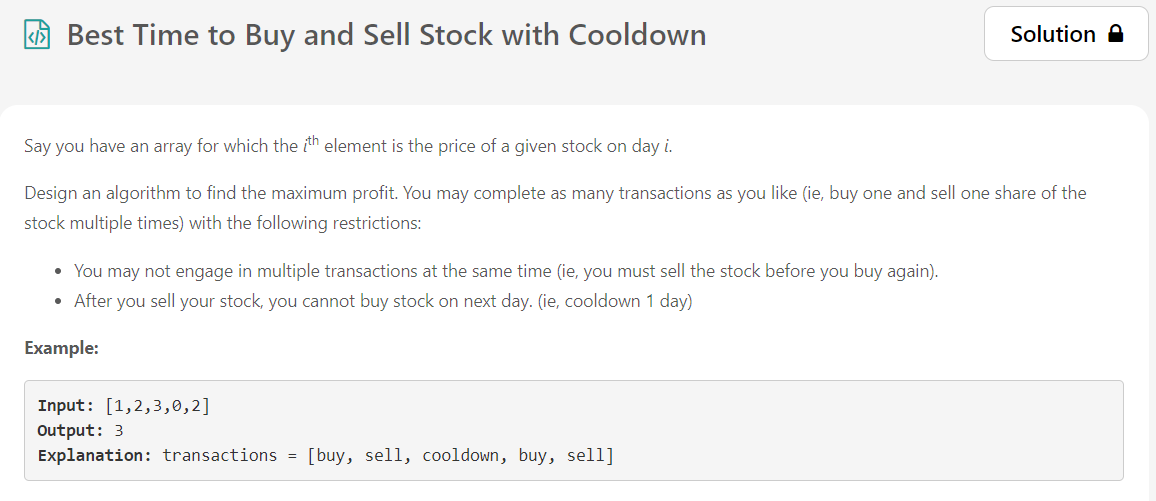

In [ ]:
# Dynamic programming. Max cash if last transaction was a 
# buy is either the max cash after an earlier last buy or 
# the max cash after an earlier sell at least 2 days ago and 
# buying now. The max cash after selling on a given day is 
# either the max cash after an earlier last sell or 
# the max cash after an earlier buy and selling now. 
# Max cash after selling = max profit since the stock is no longer held. 
# Time - O(n) 
# Space - O(1)
class Solution(object): 
    def maxProfit(self, prices): 
        """ 
        : type prices
        : List[int] :rtype: int 
        """ 
        buy, sell, prev_sell = float("-inf"), 0, 0 
        for i, price in enumerate(prices): 
            buy = max(buy, prev_sell-price) 
            prev_sell = sell 
            sell = max(sell, buy+price) 
            # print(buy, sell, prev_sell) 
        return sell


# Other fastest submissions
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        holding = float('-inf')
        cooldown = float('-inf')
        nee = 0
        
        for p in prices:
            # buy
            new_holding = max(nee - p, holding)
            # sell
            new_cooldown = holding + p
            # wait
            new_nee = max(cooldown, nee, holding)
            
            holding = new_holding
            cooldown = new_cooldown
            nee = new_nee
            
        return max(holding, cooldown, nee)

### https://leetcode.com/explore/featured/card/july-leetcoding-challenge/548/week-5-july-29th-july-31st/3405/discuss/75927/Share-my-thinking-process
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        sold,held,reset = float('-inf'),float('-inf'),0
        
        for price in prices:
            pre_sold = sold
            sold = held + price
            held = max(held,reset-price)
            reset = max(reset,pre_sold)
        
        return max(sold,reset)
 

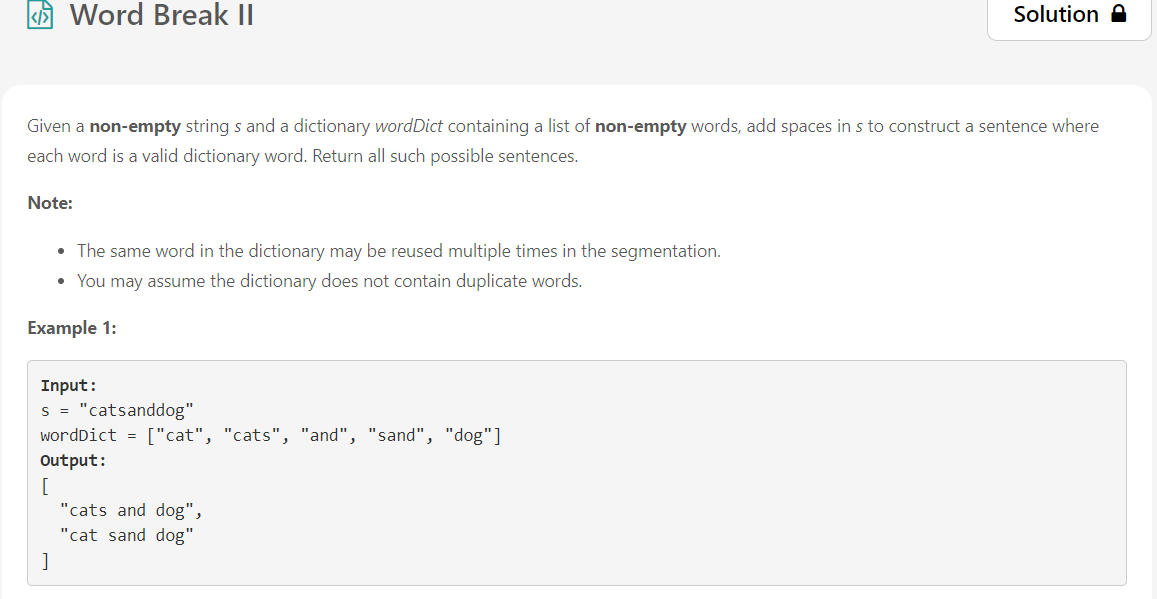

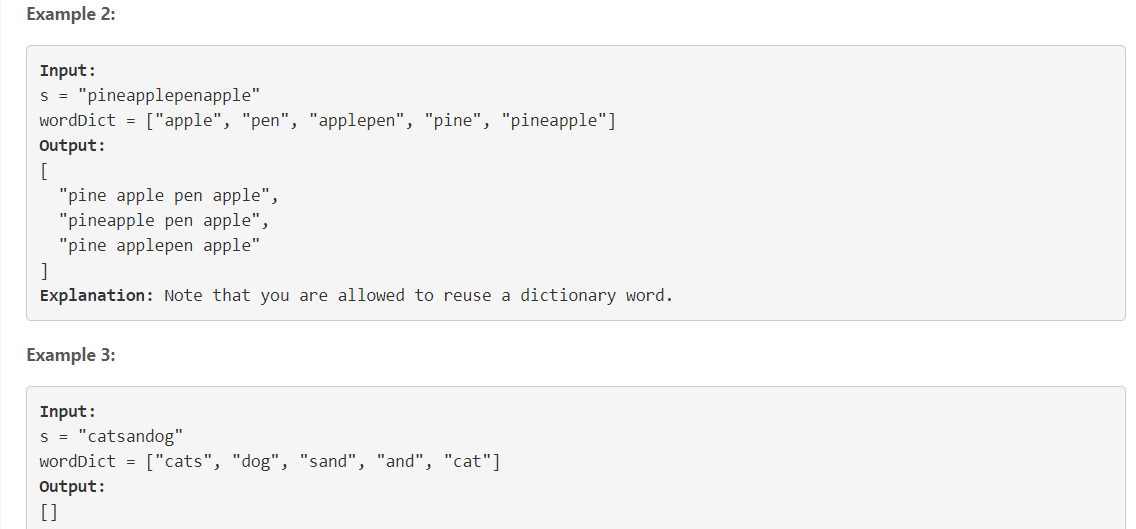

In [ ]:
# fastest submission leet code
# N^2 solution, but TLE
# class Solution:
#     def wordBreak(self, s: str, wordDict: List[str]) -> List[str]:
#         dp = collections.defaultdict(list)
#         dp[0] = [[]]
        
#         wordDict = set(wordDict)
        
#         for j in range(1, len(s) + 1):
#             for i in range(j):
#                 sub = s[i:j]
#                 if sub in wordDict and i in dp:
#                     new_words = [pre + [sub] for pre in dp[i]]
#                     dp[j].extend(new_words)
                    
#         print(dp)
#         return [" ".join(phrase) for phrase in dp[len(s)]]

class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> List[str]:
        if set(Counter(s).keys()) > set(Counter("".join(wordDict)).keys()):
            return []
        
        dp = collections.defaultdict(list)
        dp[0] = [[]]
        
        wordDict = set(wordDict)
        
        for j in range(1, len(s) + 1):
            for i in range(j):
                sub = s[i:j]
                if sub in wordDict and i in dp:
                    new_words = [pre + [sub] for pre in dp[i]]
                    dp[j].extend(new_words)
                    
        # print(dp)
        return [" ".join(phrase) for phrase in dp[len(s)]]


# sample 24 ms submission
from functools import lru_cache

class Solution(object):
    def wordBreak(self, s, wordDict):
        """
        :type s: str
        :type wordDict: List[str]
        :rtype: List[str]
        """
        wordset = set(wordDict)
        
        @lru_cache(None)
        def wordsEndingIn(i):
            if i == len(s):
                return [""]
            ans = []
            for j in range(i+1, len(s)+1):
                if s[i:j] in wordset:
                    for tail in wordsEndingIn(j):
                        if tail != '':
                            ans.append(s[i:j] + " " + tail) 
                        else:
                            ans.append(s[i:j])
            return ans
        return wordsEndingIn(0)

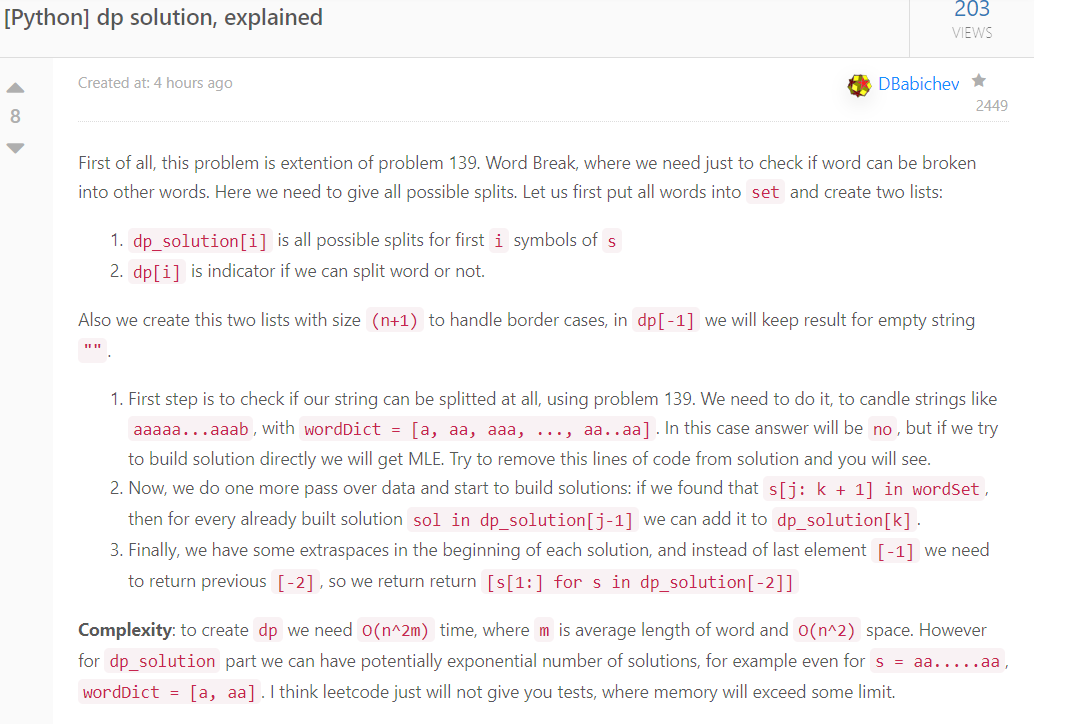

In [ ]:
# source: https://leetcode.com/explore/featured/card/july-leetcoding-challenge/548/week-5-july-29th-july-31st/3406/discuss/763221/Python-dp-solution-explained

class Solution:
    def wordBreak(self, s, wordDict):
        wordSet = set(wordDict)
        n = len(s)
        dp_solution = [[] for _ in range(n)] + [[""]]
        dp = [0] * n + [1]
        
        for k in range(n):
            for j in range(k,-1,-1):
                if s[j: k + 1] in wordSet:
                    dp[k] = max(dp[k], dp[j-1])

        if dp[-2] == 0: return []

        for k in range(n):
            for j in range(k,-1,-1):
                if s[j: k + 1] in wordSet:
                    for sol in dp_solution[j-1]:
                        dp_solution[k].append(sol + " " + s[j: k + 1])
                        
        return [s[1:] for s in dp_solution[-2]]